In [3]:
import cv2
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

### Read images from the folder

In [2]:
df = pd.DataFrame(columns = ['Target', 'Image'])
path = "*.jpg"
i = 0
for filename in glob.glob(path):
    im=Image.open(filename)
    target = int(filename[-5])
    tmp = pd.DataFrame([[target,np.array(im)]],columns = ['Target', 'Image'])
    df = pd.concat([df,tmp],ignore_index=True)

4


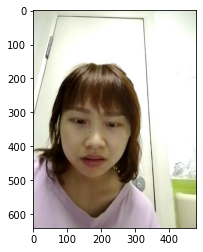

In [3]:
from matplotlib.pyplot import imshow
print(df.loc[100].Target)
imshow(df.loc[100].Image)

### Detect faces from images and use red rectangles to circumscribe them

In [4]:
tmp = df
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_alt2.xml')
face_cascade = cv2.CascadeClassifier("C:\pythonProject\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml")#绝对路径
face_cascade.load(r"C:\pythonProject\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml")#加r

for i in np.arange(len(tmp)):
    open_cv_image = np.array(tmp.loc[i].Image)
    gray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(image=gray, scaleFactor=1.05, minNeighbors=2, minSize = [30,30])


    if(len(faces) == 0):
        warnings.warn("Empty Face: No.{}!".format(i))
        continue
    areas = [w*h for x,y,w,h in faces]
    i_biggest = np.argmax(areas)
    biggest = np.array([faces[i_biggest]])

    for (x,y,w,h) in biggest:
        cv2.rectangle(open_cv_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        faces = open_cv_image[y:y+h, x:x+w]
    tmp.loc[i].Image = faces
    plt.imsave("../data/cropped data(original)/fig{}_{}.jpg".format(i, tmp.loc[i].Target), faces)

C:\Users\LW\AppData\Local\Temp\ipykernel_25208\1436898132.py:13: UserWarning: Empty Face: No.15!
  warnings.warn("Empty Face: No.{}!".format(i))
C:\Users\LW\AppData\Local\Temp\ipykernel_25208\1436898132.py:13: UserWarning: Empty Face: No.58!
  warnings.warn("Empty Face: No.{}!".format(i))


In [5]:
face_cascade = cv2.CascadeClassifier(
    'C:\pythonProject\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml')
face_cascade.load(r"C:\pythonProject\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml")
key = 100
target = df.loc[key].Target
open_cv_image = np.array(df.loc[key].Image)
gray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(image=gray, scaleFactor=1.01, minNeighbors=1, minSize=[100, 100])
areas = [w * h for x, y, w, h in faces]
i_biggest = np.argmax(areas)
biggest = np.array([faces[i_biggest]])

for (x, y, w, h) in biggest:
    cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    faces = open_cv_image[y:y + h, x:x + w]

In [6]:
#imshow(open_cv_image)

### Crop original images and remove red margins

In [4]:
# remove red margin
def corp_margin(img):
        (row,col,num)=img.shape
        new_img=img[10:col-10,10:row-10]
        return new_img

In [5]:
# fetch data from cropped data and use cropped_data store to store it
cropped_data = pd.DataFrame(columns = ['Target', 'Image'])
cropped_data_list =[]
path = "cropped data/*.jpg"
for filename in glob.glob(path):
    cropped_data_list.append(filename)
    
cropped_data_list.sort(key=lambda x:int(x[:-6][16:]))
for i in range(len(cropped_data_list)):
    filename = cropped_data_list[i]
    im=Image.open(filename)
    im = corp_margin(np.array(im))
    target = int(filename[-5])
    tmp = pd.DataFrame([[target,np.array(im)]],columns = ['Target', 'Image'])
    cropped_data = pd.concat([cropped_data,tmp],ignore_index=True)

4

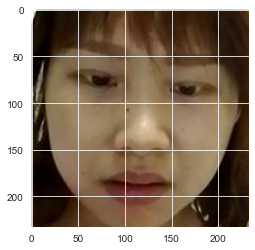

In [6]:
import cv2
plt.imshow(cropped_data.loc[100].Image)
cropped_data.loc[100].Target

### Mark the key parts of the face and visualize landmarks

In [7]:
import face_recognition
from PIL import Image,ImageDraw
from matplotlib.pyplot import imshow
import math

In [8]:
Image.fromarray(cropped_data.loc[0].Image)
face_landmarks_list = face_recognition.face_landmarks(cropped_data.loc[1].Image, model="large")
face_landmarks_dict = face_landmarks_list[0]
# print(face_landmarks_dict, end=" ")
# imshow(cropped_data.loc[0].Image)
face_landmarks_list

[{'chin': [(16, 92),
   (14, 113),
   (15, 133),
   (19, 156),
   (26, 177),
   (37, 194),
   (55, 205),
   (78, 211),
   (104, 212),
   (129, 211),
   (153, 205),
   (171, 195),
   (183, 177),
   (189, 155),
   (192, 133),
   (193, 110),
   (191, 88)],
  'left_eyebrow': [(26, 58), (36, 45), (52, 40), (69, 39), (85, 44)],
  'right_eyebrow': [(113, 43), (130, 37), (147, 36), (164, 42), (174, 55)],
  'nose_bridge': [(100, 68), (100, 82), (100, 97), (100, 112)],
  'nose_tip': [(80, 131), (90, 133), (101, 135), (112, 132), (123, 130)],
  'left_eye': [(42, 83), (51, 78), (62, 77), (73, 80), (63, 84), (51, 85)],
  'right_eye': [(128, 78),
   (138, 74),
   (149, 74),
   (160, 78),
   (150, 81),
   (139, 81)],
  'top_lip': [(67, 175),
   (77, 165),
   (91, 159),
   (101, 161),
   (111, 159),
   (126, 164),
   (141, 173),
   (135, 173),
   (111, 169),
   (101, 170),
   (92, 169),
   (72, 174)],
  'bottom_lip': [(141, 173),
   (127, 183),
   (113, 186),
   (102, 186),
   (92, 186),
   (78, 183),

In [9]:
def visualize_landmark(image_array, landmarks):
    """ plot landmarks on image
    :param image_array: numpy array of a single image
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return: plots of images with landmarks on
    """
    origin_img = Image.fromarray(image_array)
    draw = ImageDraw.Draw(origin_img)
    for facial_feature in landmarks.keys():
        draw.point(landmarks[facial_feature])
    imshow(origin_img)

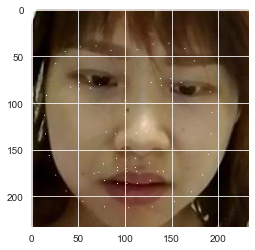

In [10]:
visualize_landmark(image_array=cropped_data.loc[100].Image,landmarks=face_landmarks_dict)
plt.savefig(fname="sample_face_detection.png", dpi = 300)

### Align faces according to eyes' position and get rotated face images

In [11]:
def align_face(image_array, landmarks):
    """ align faces according to eyes position
    :param image_array: numpy array of a single image
    :param landmarks: dict of landmarks for facial parts as keys and tuple of coordinates as values
    :return:
    rotated_img:  numpy array of aligned image
    eye_center: tuple of coordinates for eye center
    angle: degrees of rotation
    """
    # get list landmarks of left and right eye
    left_eye = landmarks['left_eye']
    right_eye = landmarks['right_eye']
    # calculate the mean point of landmarks of left and right eye
    left_eye_center = np.mean(left_eye, axis=0).astype("int")
    right_eye_center = np.mean(right_eye, axis=0).astype("int")
    # compute the angle between the eye centroids
    dy = right_eye_center[1] - left_eye_center[1]
    dx = right_eye_center[0] - left_eye_center[0]
    # compute angle between the line of 2 centeroids and the horizontal line
    angle = math.atan2(dy, dx) * 180. / math.pi
    # calculate the center of 2 eyes
    eye_center = ((left_eye_center[0] + right_eye_center[0]) // 2,
                  (left_eye_center[1] + right_eye_center[1]) // 2)
    eye_center = tuple(eye_center)
    # at the eye_center, rotate the image by the angle
    rotate_matrix = cv2.getRotationMatrix2D(center = (129,91), angle = angle, scale=1)
    rotated_img = cv2.warpAffine(image_array, rotate_matrix, (image_array.shape[1], image_array.shape[0]))
    return rotated_img, eye_center, angle

In [12]:
#  align each face from cropped_data
#  store aligned faces into the file called rotated data
from skimage.transform import resize
for i in range(len(cropped_data)):
        Image.fromarray(cropped_data.loc[i].Image)
        # locate facial landmarks
        face_landmarks_list = face_recognition.face_landmarks(cropped_data.loc[i].Image, model="large")
        if len(face_landmarks_list) != 0:
            face_landmarks_dict = face_landmarks_list[0]
            aligned_face, eye_center, angle = align_face(image_array=cropped_data.loc[i].Image, landmarks=face_landmarks_dict)
            aligned_face = resize(aligned_face,(200,200))
            plt.imsave("../data/rotated data/fig{}_{}.jpg".format(i, cropped_data.loc[i].Target), aligned_face)
        else:
            face_locations = face_recognition.face_locations(cropped_data.loc[i].Image,model="cnn")
            face_landmarks_list = face_recognition.face_landmarks(cropped_data.loc[i].Image, face_locations = face_locations, model="large")
            face_landmarks_dict = face_landmarks_list[0]
            aligned_face, eye_center, angle = align_face(image_array=cropped_data.loc[i].Image, landmarks=face_landmarks_dict)
            aligned_face = resize(aligned_face,(200,200))
            plt.imsave("../data/rotated data/fig{}_{}.jpg".format(i, cropped_data.loc[i].Target), aligned_face)

In [13]:
# fetch data from file called rotated data and use rotated_data to store it
rotated_data = pd.DataFrame(columns = ['Target', 'Image'])
path = "rotated data/*.jpg"
rotated_data_list = []
for filename in glob.glob(path):
    rotated_data_list.append(filename)
    
rotated_data_list.sort(key=lambda x:int(x[:-6][16:]))
for i in range(len(rotated_data_list)):
    filename = rotated_data_list[i]
    im=Image.open(filename)
    target = int(filename[-5])
    tmp = pd.DataFrame([[target,np.array(im)]],columns = ['Target', 'Image'])
    rotated_data = pd.concat([rotated_data,tmp],ignore_index=True)

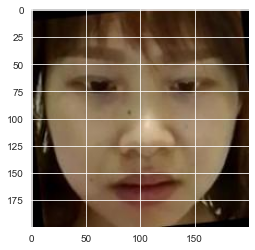

In [14]:
imshow(rotated_data.loc[100].Image)

In [15]:
print(rotated_data.loc[100].Target)

4


### Intensify Images

In [16]:
#intensity transformation
def intensity (img):
    gamma_corrected = np.array(255*(img / 255) ** 2.2, dtype = 'uint8')
    return gamma_corrected
intensity_transformation_image = intensity(rotated_data.loc[100].Image)
#imshow(intensity_transformation_image)

### Standarize Images

In [17]:
# standardize imgaes
import numpy as np
def normalize(image):
    mean = np.mean(image)
    var = np.mean(np.square(image-mean))
    image = (image - mean)/np.sqrt(var)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


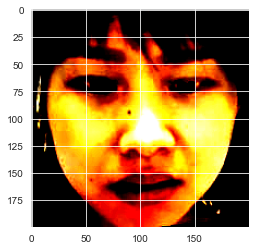

In [18]:
standardized_image = normalize(intensity_transformation_image)
imshow(standardized_image)

### Use hog method to get hog images and extract hog features 

C:\Users\PC\AppData\Local\Temp\ipykernel_16164\3432339897.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(standardized_image, orientations=8, pixels_per_cell=(16, 16),


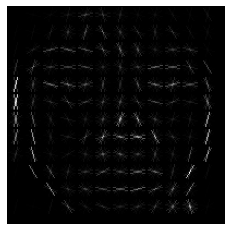

In [19]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
fd, hog_image = hog(standardized_image, orientations=8, pixels_per_cell=(16, 16),
                	cells_per_block=(4, 4), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
a = hog_image_rescaled
plt.axis("off")
# plt.imsave(fname="hog_sample.png", dpi = 300, format = "png", arr = hog_image_rescaled)
plt.imshow(hog_image_rescaled, cmap="gray")

In [20]:
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import color
import matplotlib.pyplot as plt
ppc = 16
hog_targets = []
hog_features = []
for i in range(len(rotated_data)):
    gamma_corrected = intensity(rotated_data.loc[i].Image)
    standardized_image = normalize(gamma_corrected)
    gray_image = color.rgb2gray(standardized_image)
    fd, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_targets.append(rotated_data.loc[i].Target)
    hog_features.append(fd)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    plt.imsave("../data/hog data/fig{}_{}.jpg".format(i, rotated_data.loc[i].Target), hog_image_rescaled, cmap="gray")

### Join hog features and targets together to form the dataframe

In [21]:
labels = np.array(rotated_data.Target).reshape(len(rotated_data), 1)
l = list(range(0, len(hog_features[0])))
l.append('Target')

In [22]:
# 把array里面每一项都作为一个特征，拼接成一个大的dataframe
data_frame =pd.DataFrame(columns=l)
for i in range(0,len(hog_features)):
    data = np.append(hog_features[i],hog_targets[i])
    data_frame.loc[len(data_frame.index)] = data
data_frame

,0,1,2,3,4,5,6,7,8,9,...,10359,10360,10361,10362,10363,10364,10365,10366,10367,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005158,0.044837,0.006595,0.020351,0.147332,0.121688,0.040812,0.115594,0.026980,6.0
1,0.363373,0.005768,0.001323,0.003005,0.001553,0.003415,0.002660,0.087206,0.020337,0.005803,...,0.005464,0.448570,0.278496,0.011759,0.007820,0.017661,0.006742,0.024611,0.044019,5.0
2,0.105438,0.005769,0.000000,0.000000,0.077882,0.022482,0.037352,0.306128,0.000000,0.000000,...,0.012993,0.568679,0.185620,0.027452,0.005442,0.004455,0.007162,0.010181,0.082055,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017732,0.433595,0.060144,0.006291,0.000251,0.001911,0.000036,0.000380,0.008129,0.0
4,0.000115,0.000000,0.000030,0.000000,0.000229,0.000000,0.000030,0.000000,0.000000,0.000000,...,0.009834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.048732,0.019597,0.000212,0.000402,0.000000,0.002759,0.000922,0.006507,0.050316,4.0
211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039973,0.068465,0.012366,0.008201,0.008787,0.013062,0.022373,0.066047,0.246086,5.0
212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.093639,0.398444,0.066413,0.014490,0.003521,0.007665,0.014758,0.021037,0.075312,2.0
213,0.000538,0.000000,0.000091,0.000000,0.000193,0.000000,0.000091,0.000000,0.006521,0.001241,...,0.003542,0.043743,0.252318,0.059342,0.005256,0.002063,0.001352,0.000000,0.006312,4.0


In [23]:
data_frame.Target = data_frame.Target.astype('int64')
x = data_frame.iloc[:,0:-1]

### Use PCA to reduce dimensions and get the 15th important features

In [24]:
# PCA 降维
#不一定是按顺序排列的（不能按顺序逐列加），而且要使权重和超过一定值
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 标准化
x = StandardScaler().fit_transform(x)
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.3) + 1
d
pca = PCA(n_components=d)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = list(range(0,d)))
finalDf = pd.concat([principalDf, data_frame[['Target']]], axis = 1)
finalDf.columns = [str(x) for x in finalDf.columns]
finalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
0,16.043214,-24.038097,31.288523,4.182220,7.850484,5.073179,49.127291,25.306411,37.782783,-2.343106,15.385971,6.227472,52.339624,68.439209,37.981159,6
1,3.258072,10.336968,-6.186551,-18.078627,-13.364761,5.596146,10.295335,0.640318,-7.735690,6.226250,-1.269733,-2.340742,-2.806091,-1.293559,5.542720,5
2,13.066176,25.345783,-15.664086,-14.858403,-3.641958,3.677284,9.424463,5.988656,1.740705,10.556083,5.449489,0.248509,-12.922280,1.997681,-0.528629,0
3,37.862915,-0.325901,1.085172,5.541692,15.537242,-22.076451,-20.855737,-7.076746,-23.559108,4.527953,-4.862073,8.409809,-4.235268,15.797501,-8.422506,0
4,9.558435,2.308669,-1.522624,-15.310793,16.943446,-26.319352,1.444137,5.274305,-27.269697,-26.356756,2.633096,-2.934858,4.457962,13.776540,20.360644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,19.891934,-8.162351,4.919477,-11.967545,18.243093,-6.196845,-5.117267,0.366387,-12.710647,-12.358811,-1.470036,19.501117,10.905973,9.638387,9.227844,4
211,29.082441,-6.949120,13.127227,56.263779,31.754399,-12.057980,34.855416,-13.960200,-7.036139,8.283890,3.361583,-6.760045,-6.848031,11.862609,-24.606785,5
212,0.182025,-25.765397,-20.266235,-7.582366,7.968893,-5.452350,-6.850899,-20.503823,-10.679956,-7.836500,-22.420687,-6.634216,2.874410,15.130328,11.577176,2
213,-3.834002,-15.155621,-38.373114,-5.471478,-6.337546,-7.072922,12.824243,-5.119377,-0.291383,10.665421,-17.469608,2.161251,-2.446730,11.933249,12.300213,4


In [25]:
d

15

In [26]:
finalDf[finalDf['Target']==7]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target
28,-26.498215,-2.089060,-15.310740,-19.250846,-2.371086,-6.139851,-4.036962,1.002079,-1.185314,8.452581,14.027317,1.524764,-3.421650,9.916649,-4.954660,7
176,-1.815257,25.257577,1.116153,-13.020100,-24.422615,-3.884004,-1.221812,3.894150,2.887496,3.097552,6.345095,-8.993113,-7.193485,-1.293784,-5.532191,7
177,20.771921,9.100147,6.803690,-23.294322,7.460663,3.223174,-28.269686,-11.765537,-5.822514,2.502915,12.882950,13.659296,1.836536,12.750532,7.305147,7


### Merge Targets with Level 7 into Level 6

In [27]:
for i in np.arange(len(finalDf)):
    if finalDf["Target"][i] == 7:
        finalDf.iloc[i,-1] = 6

### Visualize the amount of samples in each category

Original dataset shape Counter({0: 76, 2: 37, 3: 29, 1: 24, 5: 17, 6: 16, 4: 16})


<AxesSubplot:xlabel='Target', ylabel='count'>

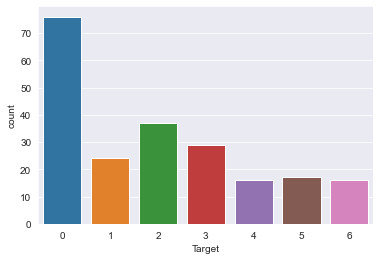

In [28]:
from collections import Counter
import seaborn as sns
print('Original dataset shape %s' % Counter( finalDf['Target']))
sns.countplot(data=finalDf,x='Target')

### Add averages of samples from category 7 into the original data in order to increase the amount of the corresponding samples

In [29]:
test = finalDf.copy()

In [30]:
test_varible = test.iloc[:,:-1]
test_varible 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,16.043214,-24.038097,31.288523,4.182220,7.850484,5.073179,49.127291,25.306411,37.782783,-2.343106,15.385971,6.227472,52.339624,68.439209,37.981159
1,3.258072,10.336968,-6.186551,-18.078627,-13.364761,5.596146,10.295335,0.640318,-7.735690,6.226250,-1.269733,-2.340742,-2.806091,-1.293559,5.542720
2,13.066176,25.345783,-15.664086,-14.858403,-3.641958,3.677284,9.424463,5.988656,1.740705,10.556083,5.449489,0.248509,-12.922280,1.997681,-0.528629
3,37.862915,-0.325901,1.085172,5.541692,15.537242,-22.076451,-20.855737,-7.076746,-23.559108,4.527953,-4.862073,8.409809,-4.235268,15.797501,-8.422506
4,9.558435,2.308669,-1.522624,-15.310793,16.943446,-26.319352,1.444137,5.274305,-27.269697,-26.356756,2.633096,-2.934858,4.457962,13.776540,20.360644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,19.891934,-8.162351,4.919477,-11.967545,18.243093,-6.196845,-5.117267,0.366387,-12.710647,-12.358811,-1.470036,19.501117,10.905973,9.638387,9.227844
211,29.082441,-6.949120,13.127227,56.263779,31.754399,-12.057980,34.855416,-13.960200,-7.036139,8.283890,3.361583,-6.760045,-6.848031,11.862609,-24.606785
212,0.182025,-25.765397,-20.266235,-7.582366,7.968893,-5.452350,-6.850899,-20.503823,-10.679956,-7.836500,-22.420687,-6.634216,2.874410,15.130328,11.577176
213,-3.834002,-15.155621,-38.373114,-5.471478,-6.337546,-7.072922,12.824243,-5.119377,-0.291383,10.665421,-17.469608,2.161251,-2.446730,11.933249,12.300213


### Standardize the data before spliting data

In [31]:
test_varible  = pd.DataFrame(StandardScaler().fit_transform(finalDf),index=finalDf.index)
test_varible

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.774011,-1.309871,1.833831,0.249062,0.488470,0.345396,3.439135,1.874000,2.882785,-0.181690,1.251779,0.521307,4.442574,5.890896,3.386163,2.035824
1,0.157187,0.563276,-0.362596,-1.076628,-0.831577,0.381001,0.720721,0.047417,-0.590225,0.482799,-0.103304,-0.195946,-0.238180,-0.111343,0.494154,1.526868
2,0.630383,1.381128,-0.918077,-0.884856,-0.226609,0.250359,0.659756,0.443474,0.132814,0.818544,0.443362,0.020803,-1.096840,0.171950,-0.047129,-1.017912
3,1.826711,-0.017759,0.063602,0.330022,0.966752,-1.503025,-1.459997,-0.524050,-1.797534,0.351108,-0.395571,0.703993,-0.359488,1.359768,-0.750898,-1.017912
4,0.461150,0.125803,-0.089241,-0.911797,1.054249,-1.791893,0.101096,0.390575,-2.080648,-2.043767,0.214225,-0.245680,0.378391,1.185814,1.815228,-1.017912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.959694,-0.444778,0.288332,-0.712698,1.135115,-0.421898,-0.358232,0.027132,-0.969809,-0.958332,-0.119600,1.632456,0.925696,0.829623,0.822697,1.017912
211,1.403093,-0.378668,0.769391,3.350652,1.975810,-0.820940,2.440039,-1.033786,-0.536850,0.642353,0.273493,-0.565889,-0.581259,1.021073,-2.193787,1.526868
212,0.008782,-1.403994,-1.187811,-0.451549,0.495837,-0.371211,-0.479594,-1.518357,-0.814869,-0.607661,-1.824113,-0.555356,0.243979,1.302341,1.032149,0.000000
213,-0.184973,-0.825852,-2.249061,-0.325841,-0.394332,-0.481544,0.897756,-0.379102,-0.022232,0.827023,-1.421301,0.180920,-0.207678,1.027153,1.096610,1.017912


### Use stratified sampling and split the data into the train set and the test set 

In [93]:
# 划分训练集和测试集
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.pipeline import Pipeline
from typing import final
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(test_varible,finalDf["Target"],test_size=0.3,random_state=42,shuffle=True,stratify=finalDf["Target"])

In [94]:
finalDf["Target"]

0      6
1      5
2      0
3      0
4      0
      ..
210    4
211    5
212    2
213    4
214    2
Name: Target, Length: 215, dtype: int64

### Use smote method to make the number of samples in different categories balanced

Resampled dataset shape Counter({0: 53, 1: 26, 2: 26, 3: 26, 4: 26, 5: 26, 6: 26})


Target
0         53
1         26
2         26
3         26
4         26
5         26
6         26
dtype: int64

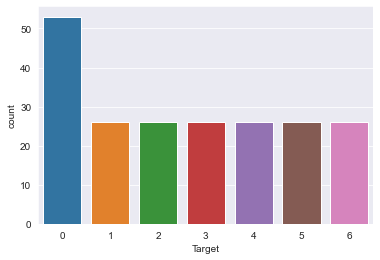

In [95]:
over = SMOTE()
under = RandomUnderSampler(sampling_strategy = {0:53, 1:26, 2:26, 3:26,
    4:26, 5:26, 6:26})
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)

X_res, y_res = over.fit_resample(x_train, y_train)
X_res, y_res = under.fit_resample(X_res, y_res)
y_res = pd.DataFrame(y_res)
y_res.columns =['Target']
print('Resampled dataset shape %s' % Counter(y_res['Target']))
sns.countplot(x='Target',data=y_res)
y_res.value_counts()

### Standarize the data before applying SVM

In [96]:
# 标准化
x_train_scaled = pd.DataFrame(StandardScaler().fit_transform(x_train),index=x_train.index)
x_test_scaled = pd.DataFrame(StandardScaler().fit_transform(x_test),index=x_test.index)

### Use GridSearch to get best parameters for SVM

In [97]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['rbf'],'C':np.linspace(0.01,4,100),'gamma':np.linspace(0.0001,0.02,50)}
svc = svm.SVC(decision_function_shape='ovr',probability=True)
model = GridSearchCV(svc,parameters,cv=5,scoring='accuracy',)
model.fit(x_train_scaled,y_train)
print(model.best_params_)
model.score(x_test_scaled,y_test)

{'C': 2.7103030303030304, 'gamma': 0.01756326530612245, 'kernel': 'rbf'}


0.5846153846153846

### Draw ROC for each category

In [98]:
from sklearn.preprocessing import label_binarize
classes = list(range(7))
y_test_binarize = label_binarize(y_test, classes=classes)
# y_test_binarize = pd.DataFrame(y_test_binarize)
# y_test_binarize.index = y_test.index
y_score = model.decision_function(x_test_scaled)

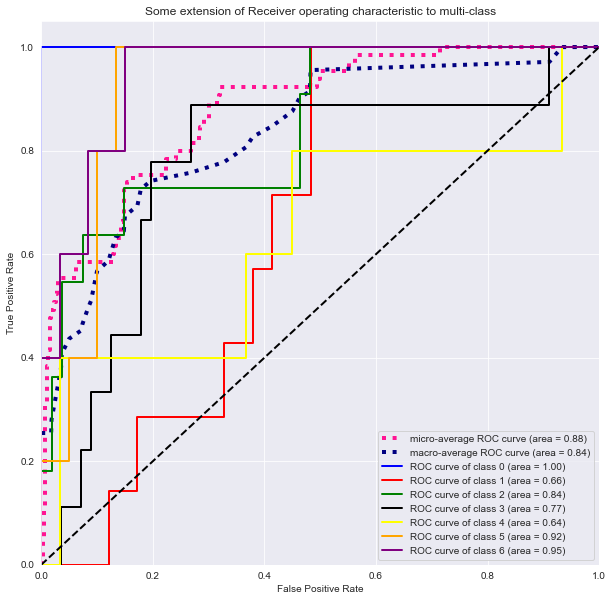

In [99]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from itertools import cycle
import sys
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'red', 'green', 'black', 'yellow','orange','purple','brown'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

# plt.figure(figsize=(300,300))
plt.savefig(fname = "model_performance.png", format = 'png', dpi = 300)
# plt.show()

### Present reports for SVM

In [100]:
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")
y_pred = model.predict(x_test_scaled)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.5846153846153846


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       0.00      0.00      0.00         7
           2       0.47      0.73      0.57        11
           3       0.38      0.33      0.35         9
           4       0.00      0.00      0.00         5
           5       0.33      0.20      0.25         5
           6       0.60      0.60      0.60         5

    accuracy                           0.58        65
   macro avg       0.36      0.41      0.38        65
weighted avg       0.47      0.58      0.52        65



### Draw ROC for the aggregate performance

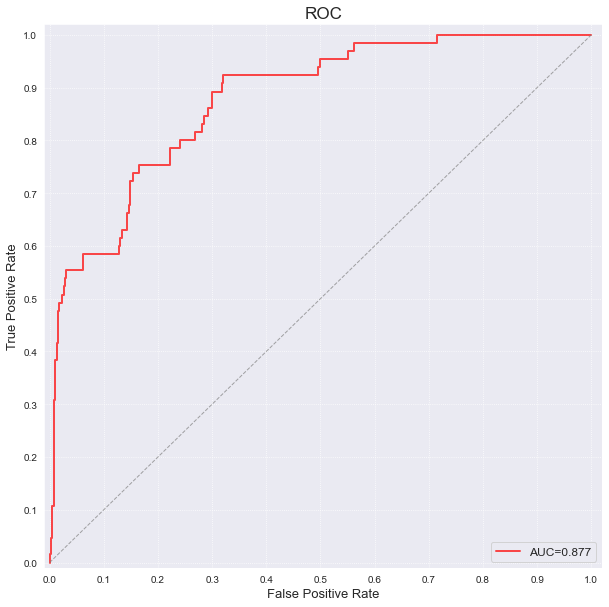

In [101]:
from sklearn import metrics
classes = list(range(7))
# y_score = model.decision_function(x_test_scaled)
# y_score = model.predict_proba(x_test_scaled)
y_pred=model.predict(x_test_scaled)
y_binarize = label_binarize(y_test, classes=classes)
y_fit=label_binarize(y_pred, classes=classes)
fpr, tpr, _= metrics.roc_curve(y_binarize.ravel(),y_fit.ravel())
fpr, tpr, thresholds = metrics.roc_curve(y_binarize.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'ROC', fontsize=17)
plt.savefig(fname = "ROC.png", format = "png", dpi = 300)
plt.show()

In [43]:
test_varible

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.774011,-1.309871,1.833831,0.249062,0.488470,0.345396,3.439135,1.874000,2.882785,-0.181690,1.251779,0.521307,4.442574,5.890896,3.386163,2.035824
1,0.157187,0.563276,-0.362596,-1.076628,-0.831577,0.381001,0.720721,0.047417,-0.590225,0.482799,-0.103304,-0.195946,-0.238180,-0.111343,0.494154,1.526868
2,0.630383,1.381128,-0.918077,-0.884856,-0.226609,0.250359,0.659756,0.443474,0.132814,0.818544,0.443362,0.020803,-1.096840,0.171950,-0.047129,-1.017912
3,1.826711,-0.017759,0.063602,0.330022,0.966752,-1.503025,-1.459997,-0.524050,-1.797534,0.351108,-0.395571,0.703993,-0.359488,1.359768,-0.750898,-1.017912
4,0.461150,0.125803,-0.089241,-0.911797,1.054249,-1.791893,0.101096,0.390575,-2.080648,-2.043767,0.214225,-0.245680,0.378391,1.185814,1.815228,-1.017912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.959694,-0.444778,0.288332,-0.712698,1.135115,-0.421898,-0.358232,0.027132,-0.969809,-0.958332,-0.119600,1.632456,0.925696,0.829623,0.822697,1.017912
211,1.403093,-0.378668,0.769391,3.350652,1.975810,-0.820940,2.440039,-1.033786,-0.536850,0.642353,0.273493,-0.565889,-0.581259,1.021073,-2.193787,1.526868
212,0.008782,-1.403994,-1.187811,-0.451549,0.495837,-0.371211,-0.479594,-1.518357,-0.814869,-0.607661,-1.824113,-0.555356,0.243979,1.302341,1.032149,0.000000
213,-0.184973,-0.825852,-2.249061,-0.325841,-0.394332,-0.481544,0.897756,-0.379102,-0.022232,0.827023,-1.421301,0.180920,-0.207678,1.027153,1.096610,1.017912


In [52]:
target = finalDf["Target"].copy()

### cross-validation

In [67]:
auc_list = []
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=40)

In [ ]:
i = 1
for train_index, test_index in skf.split(test_varible, target):
    print('Experiment:',i)
    X_train, X_test = test_varible.iloc[train_index], test_varible.iloc[test_index]
    y_train, y_test = target[train_index],target[test_index]
    print('SMOTE')
    over = SMOTE()
    under = RandomUnderSampler(sampling_strategy = {0:53, 1:26, 2:26, 3:26,
        4:26, 5:26, 6:26})
    # steps = [('o', over), ('u', under)]
    # pipeline = Pipeline(steps=steps)

    X_res, y_res = over.fit_resample(X_train, y_train)
    X_res, y_res = under.fit_resample(X_res, y_res)
    y_res = pd.DataFrame(y_res)
    y_res.columns =['Target']
    print('Resampled dataset shape %s' % Counter(y_res['Target']))
    x_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train),index=X_train.index)
    x_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test),index=X_test.index)
    print('SVM')
    parameters={'kernel':['rbf'],'C':np.linspace(0.01,4,100),'gamma':np.linspace(0.0001,0.02,50)}
    svc = svm.SVC(decision_function_shape='ovr',probability=True)
    model = GridSearchCV(svc,parameters,cv=5,scoring='accuracy',)
    model.fit(x_train_scaled,y_train)
    print(model.best_params_)
    classes = list(range(7))
    y_pred=model.predict(x_test_scaled)
    y_score = model.decision_function(x_test_scaled)
    y_binarize = label_binarize(y_test, classes=classes)
    y_fit=label_binarize(y_pred, classes=classes)
    fpr, tpr, _= metrics.roc_curve(y_binarize.ravel(),y_fit.ravel())
    fpr, tpr, thresholds = metrics.roc_curve(y_binarize.ravel(),y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print(auc)
    auc_list.append(auc)
    print()
    i = i+1

In [ ]:
auc_list

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
mean = stats.describe(auc_list)[2]

In [ ]:
var = stats.describe(auc_list)[3]
std = math.sqrt(var)

In [ ]:
CI = stats.norm.interval(0.95,loc=mean,scale=std)
CI

In [ ]:
import matplotlib.pyplot as plt
plt.title('Probability Density Curve')
sns.distplot(auc_list, hist=False, kde=True, fit=stats.norm, fit_kws={'color':'black','label':'u=0,s=1','linestyle':'-'})
plt.savefig(fname="probability density curve.png", dpi = 300)
plt.show()

In [78]:
auc_list

[0.8763774104683195,
 0.8984159779614325,
 0.8615702479338843,
 0.8598484848484849,
 0.8756887052341598,
 0.9380196523053665,
 0.8733938019652305,
 0.8711262282690853,
 0.9331065759637188,
 0.8960695389266817]

In [79]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [83]:
mean = stats.describe(auc_list)[2]

In [84]:
var = stats.describe(auc_list)[3]
std = math.sqrt(var)

In [86]:
CI = stats.norm.interval(0.95,loc=mean,scale=std)
CI

(0.8337609280391769, 0.9429623967360958)

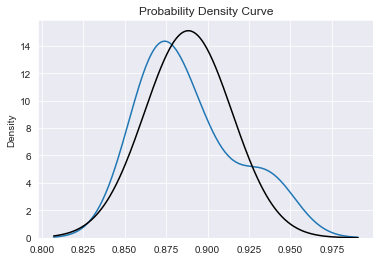

In [92]:
import matplotlib.pyplot as plt
plt.title('Probability Density Curve')
sns.distplot(auc_list, hist=False, kde=True, fit=stats.norm, fit_kws={'color':'black','label':'u=0,s=1','linestyle':'-'})
plt.savefig(fname="probability density curve.png", dpi = 300)
plt.show()